<a href="https://colab.research.google.com/github/viniciusmaurente/Artificial-intelligence-classification-plants-Python/blob/master/Handson_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer vision for inspection of metal parts (carbon steel)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
image = cv2.imread('/content/drive/MyDrive/visao computacional opencv/corrosa-dif-text.jpg')     
   

In [ ]:
image.shape

(416, 416, 3)

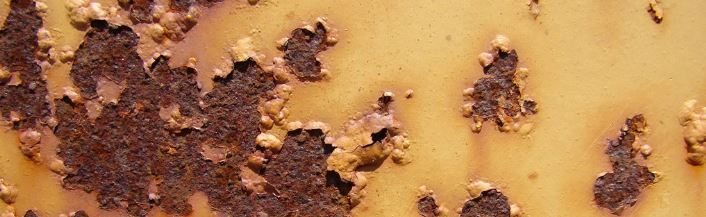

In [100]:
#cv2.imshow(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
image = cv2.resize(image,(500,500))
image.shape

(500, 500, 3)

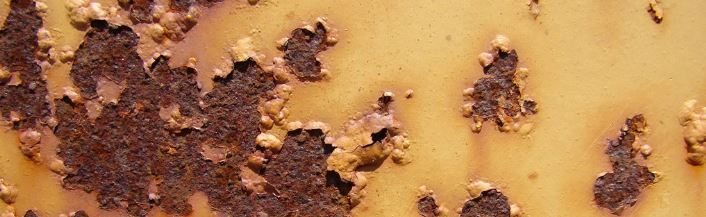

In [101]:
blurred_frame = cv2.GaussianBlur(image, (5,5), 0)
cv2_imshow(image)


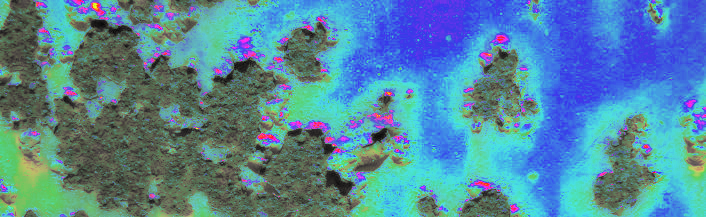

In [102]:
hsv_frame = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
cv2_imshow(hsv_frame)

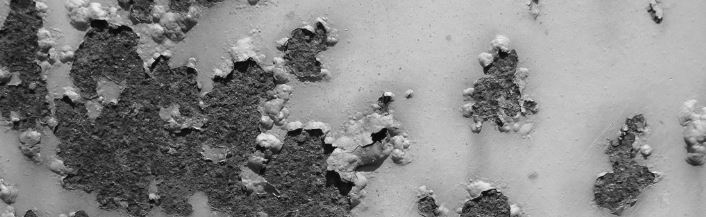

In [103]:
image_cinza = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_cinza)


In [ ]:
image_cinza.shape

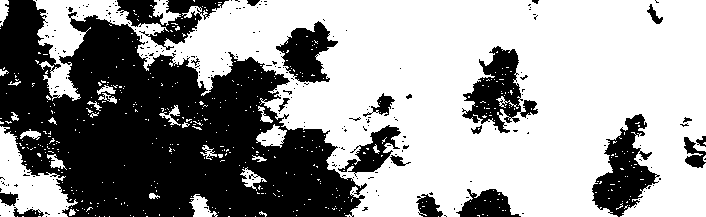

In [104]:
(thresh, image_seg) = cv2.threshold(image_cinza, 125, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 130
image_seg = cv2.threshold(image_cinza, thresh, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(image_seg)

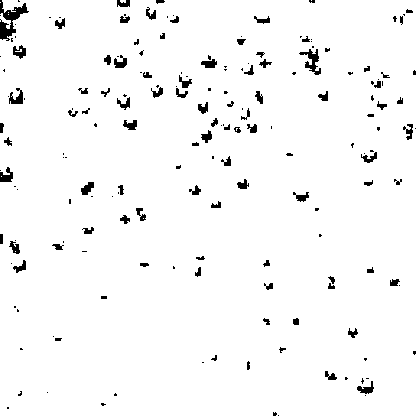

In [71]:
mask_inv = cv2.bitwise_not(image_seg)
cv2_imshow(mask_inv)

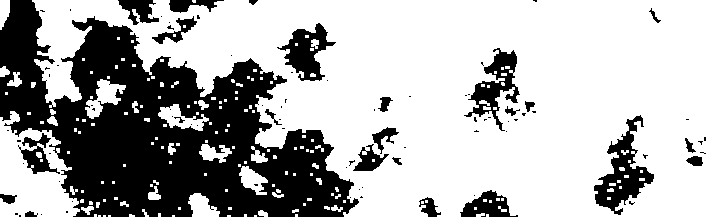

In [105]:
for i in range(0,1):
	image_dilated = cv2.dilate(image_seg, None, iterations=i + 1)
	cv2_imshow(image_dilated)


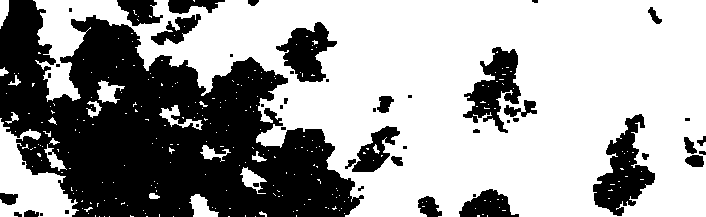

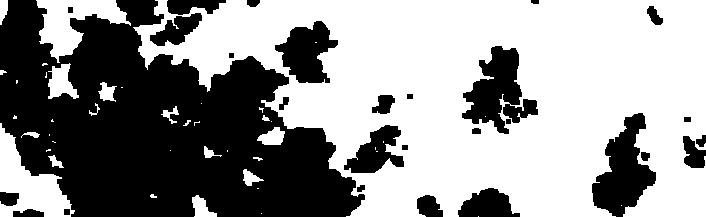

In [107]:
for i in range(0, 2):
	image_eroded = cv2.erode(image_dilated, None, iterations=i + 1)
	cv2_imshow(image_eroded)


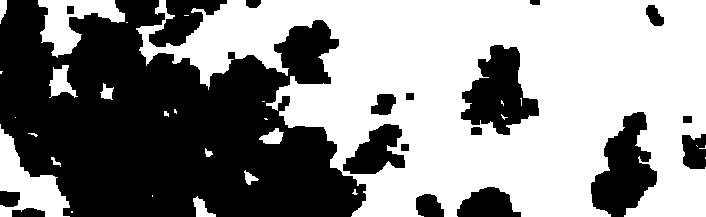

In [108]:
for i in range(0, 1):
	image_eroded2 = cv2.erode(image_eroded, None, iterations=i + 1)
	cv2_imshow(image_eroded2)


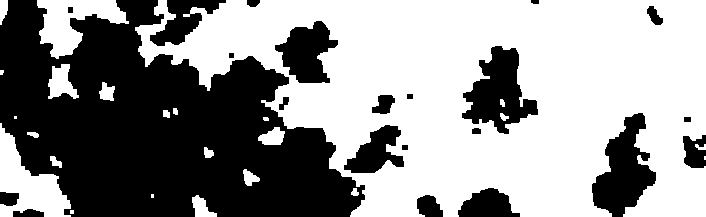

In [109]:
for i in range(0,1):
	image_morpho = cv2.dilate(image_eroded2, None, iterations=i + 1)
cv2_imshow(image_morpho)


Area do defeito encontrado (pixels):   119.5
Numero de defeitos encontrados ->  36


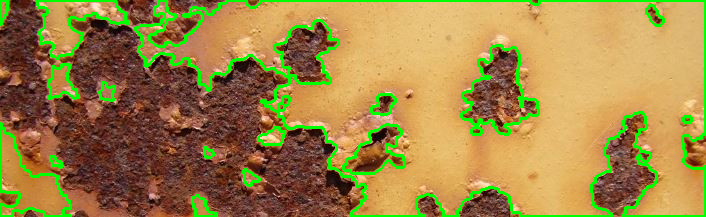

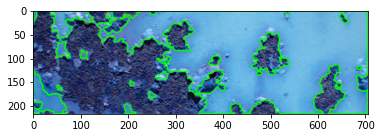

In [112]:
contours, hierarchy = cv2.findContours(image_morpho, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  area = cv2.contourArea(contour)
  
  if area > 40:
    image_contour = cv2.drawContours(image, contour, -1, (0,255,0), 2)

print("Area do defeito encontrado (pixels):  ", area)
print("Numero de defeitos encontrados -> ", len(contours))


cv2_imshow(image_contour)
plt.imshow(image_contour)
plt.show()



Area do defeito encontrado (pixels):   23.0
Numero de defeitos encontrados ->  292


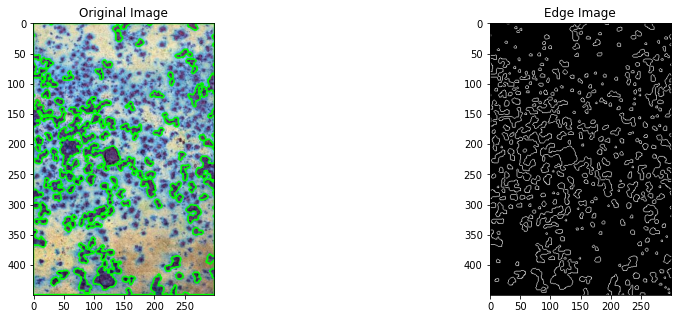

In [47]:
edges = cv2.Canny(image_morpho,100,200)

fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(image,cmap = 'gray')
ax[0].set_title('Original Image') 
ax[0].axis('on')
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edge Image')
ax[1].axis('on')
print("Area do defeito encontrado (pixels):  ", area)
print("Numero de defeitos encontrados -> ", len(contours))

plt.show()

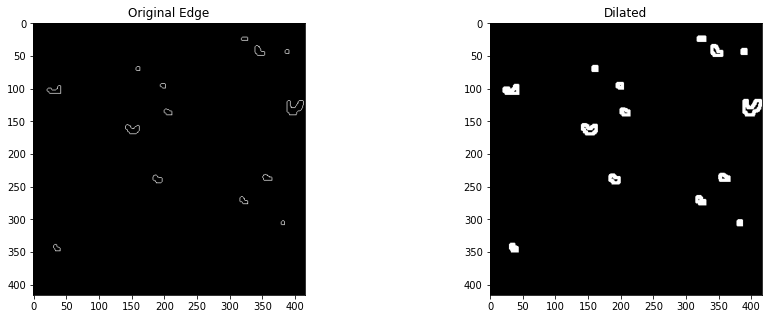

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(edges,cmap = 'gray')
ax[0].set_title('Original Edge') 
ax[0].axis('on')
ax[1].imshow(dilation,cmap = 'gray')
ax[1].set_title('Dilated')
plt.axis('on')
plt.show()

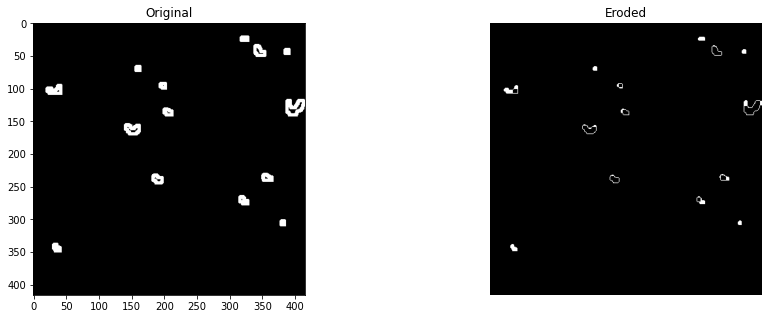

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(dilation,cmap = 'gray')
ax[0].set_title('Original') 
plt.axis('off')
ax[1].imshow(erosion,cmap = 'gray')
ax[1].set_title('Eroded')
plt.axis('off')
plt.show()

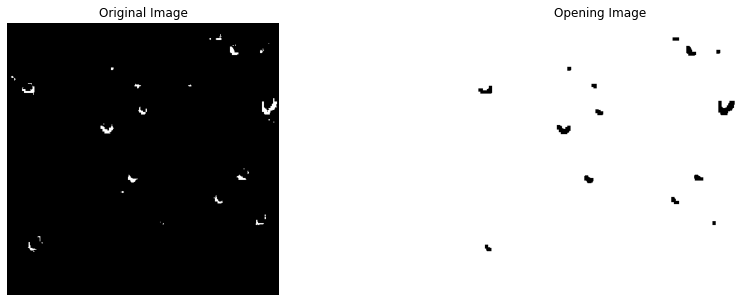

In [ ]:
kernel = np.ones((10,10),np.uint8)
edges_3 = cv2.Canny(image_seg,125,255)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(image_seg, cmap='gray')
ax[0].set_title('Original Image') 
ax[0].axis('off')
ax[1].imshow(image_morpho,cmap = 'gray')
ax[1].set_title('Opening Image')
ax[1].axis('off')
plt.show()

In [ ]:
blurred_frame = cv2.GaussianBlur(image, (5,5), 0)

lower_green = np.array([0,0,0])
upper_green = np.array([0,0,0])
mask = cv2.inRange(image, lower_green, upper_green)

contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
  area = cv2.contourArea(contour)

  if area > 50:
    cv2.drawContours(image, contour, -1, (0,255,0), 3)

print("Area do defeito encontrado (pixels):  ", area)
print("Numero de defeitos encontrados -> ", len(contours))


cv2_imshow(blurred_frame)
